<a href="https://colab.research.google.com/github/Faten123-ux/Intern-Intelligence-Model-Hyperparameter-Tuning-/blob/main/Hyperparameter_Tuning_on_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Load the Dataset



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()

# Convert to Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target column

# Display first 5 rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#  Check Dataset Structure

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Display dataset shape
print(f"Dataset Shape: {df.shape}")

# Display basic statistics
print(df.describe())


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Dataset Shape: (569, 31)
       mean radius  mean texture  mean perimeter    mean area  

# Visualizing Target Distribution




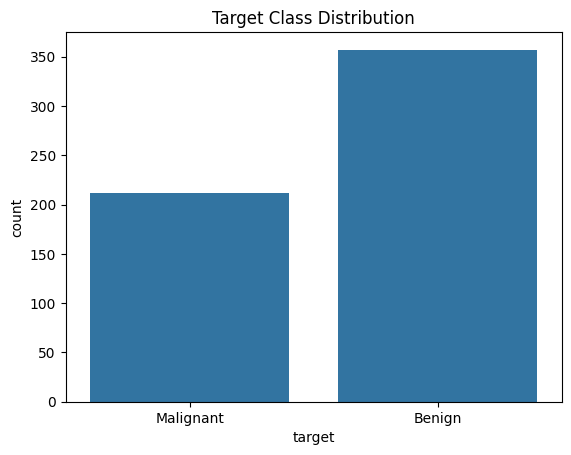

In [ ]:
# Countplot for class distribution
sns.countplot(x=df['target'])
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'])
plt.title("Target Class Distribution")
plt.show()



# Feature Correlation Analysis

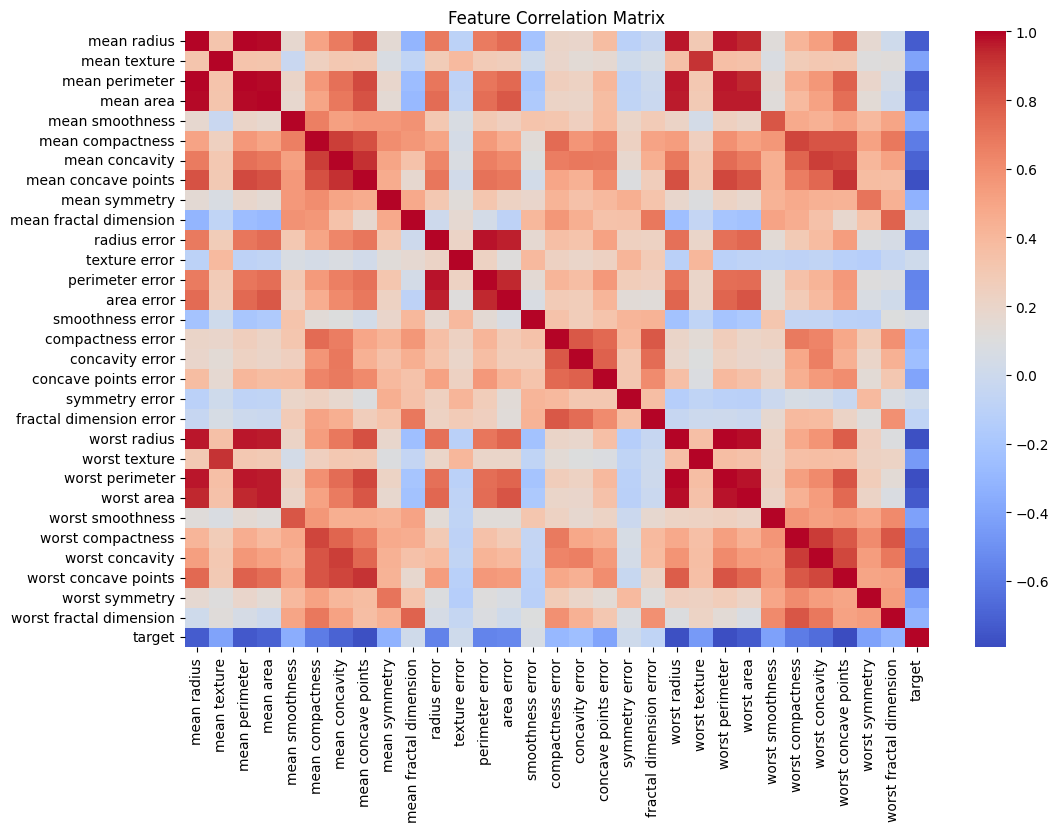

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


# Boxplot to Check Outliers





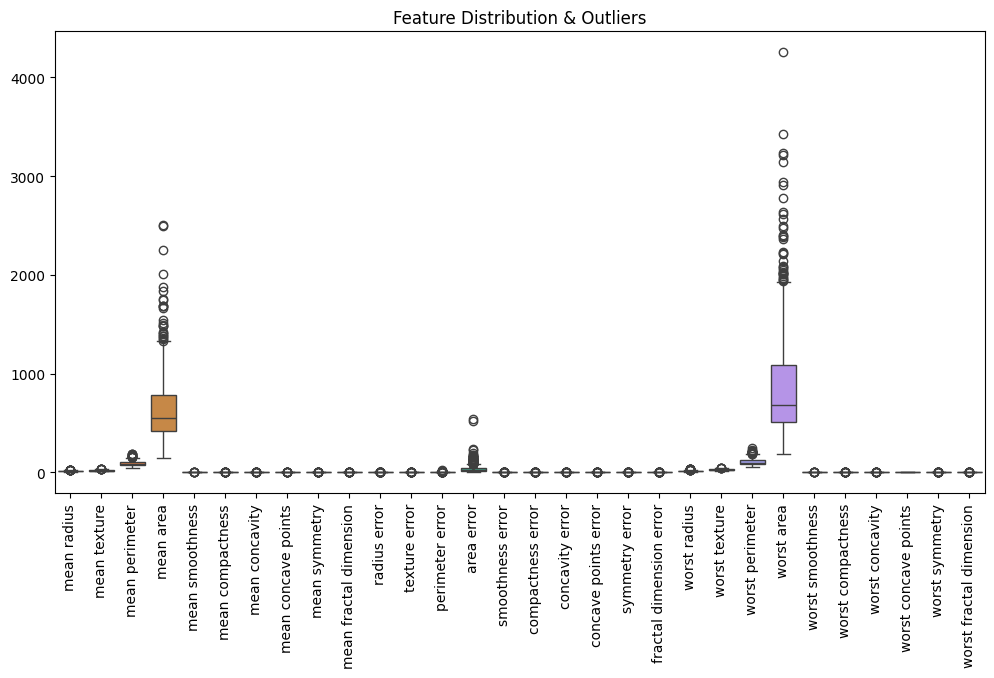

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title("Feature Distribution & Outliers")
plt.show()





# Feature Selection Before Hyperparameter Tuning


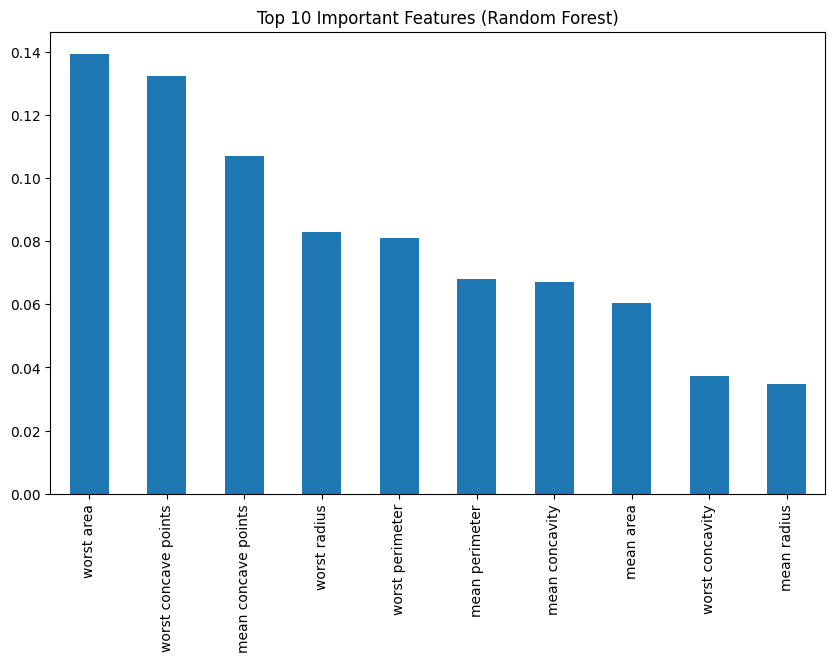

In [ ]:
#Feature Importance Using Random Forest
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Split features and target
X = df.drop(columns=['target'])
y = df['target']

# Train a basic Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()



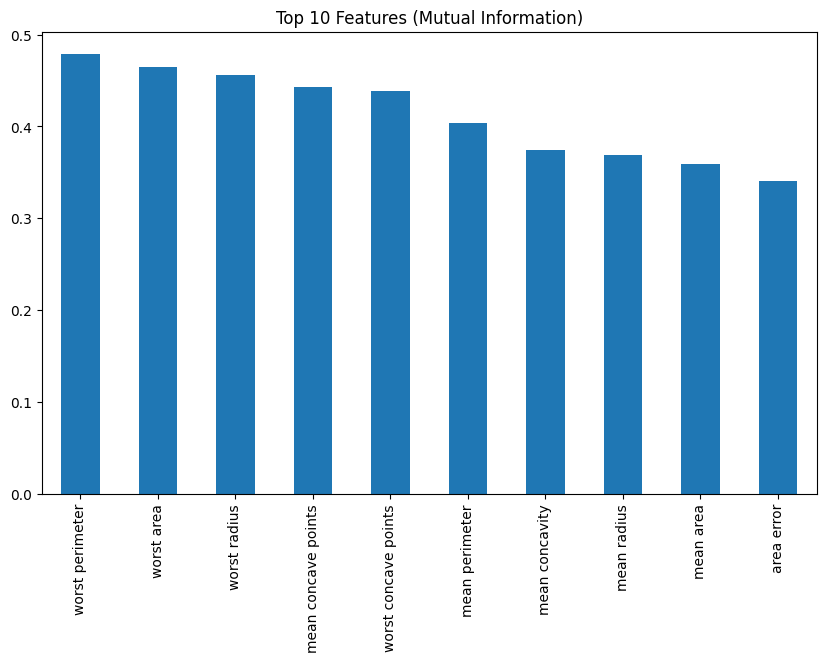

In [ ]:
# Feature Selection Using Mutual Information
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot scores
plt.figure(figsize=(10, 6))
mi_scores.head(10).plot(kind='bar')
plt.title("Top 10 Features (Mutual Information)")
plt.show()


In [ ]:
# Using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use Logistic Regression as a base model
model = LogisticRegression(max_iter=5000)

# Apply RFE
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())




Selected Features: ['mean radius', 'mean compactness', 'mean concavity', 'texture error', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']


# Hyperparameter Tuning with Selected Features

In [ ]:
# Keep only the selected features
X_selected = X[selected_features]

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# Perform Hyperparameter Tuning with Selected Features



In [ ]:
#Grid Search (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Print best parameters
print("Best parameters (Grid Search):", grid_search.best_params_)
print(f"Best Model Accuracy (Grid Search): {accuracy * 100:.2f}%")




Best parameters (Grid Search): {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Accuracy (Grid Search): 95.61%


In [ ]:
# Random Search (Random Forest)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11)
}

# Initialize Random Search
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

best_model_random = random_search.best_estimator_

y_pred_random = best_model_random.predict(X_test)

accuracy_random = accuracy_score(y_test, y_pred_random)


# Print best parameters
print("Best parameters (Random Search):", random_search.best_params_)
print(f"Best Model Accuracy (Random Search): {accuracy_random * 100:.2f}%")


Best parameters (Random Search): {'n_estimators': np.int64(200), 'min_samples_split': np.int64(7), 'max_depth': 20}
Best Model Accuracy (Random Search): 95.61%


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 19.3 MB/s eta 0:00:00


In [ ]:
# Bayesian Optimization (Optuna for XGBoost)
# Bayesian Optimization (Optuna for XGBoost)
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define Objective Function
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)

    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return accuracy_score(y_test, preds)

# Run Optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Print best parameters
# Access the parameters through the best_trial attribute
print("Best parameters (Optuna):", study.best_trial.params)


[I 2025-03-26 11:22:38,097] A new study created in memory with name: no-name-59beba3f-4302-4054-8f56-19bf35dde5c7
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:22:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-26 11:22:38,452] Trial 0 finished with value: 0.9473684210526315 and parameters: {'n_estimators': 50, 'max_depth': 13, 'learning_rate': 0.209185046061118}. Best is trial 0 with value: 0.9473684210526315.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:22:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-26 11:22:38,514] Trial 1 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.24285516741286625}. Best is trial 1 with value: 0.9649122807017544.
/usr/local/lib/python3.11/dist

Best parameters (Optuna): {'n_estimators': 250, 'max_depth': 13, 'learning_rate': 0.08562142067910387}


# Evaluate Best Models



In [ ]:
from sklearn.metrics import classification_report

# Train best models using selected features
best_rf = RandomForestClassifier(**random_search.best_params_).fit(X_train, y_train)
# Access the parameters through the best_trial attribute
best_xgb = XGBClassifier(**study.best_trial.params).fit(X_train, y_train)

# Make predictions
rf_preds = best_rf.predict(X_test)
xgb_preds = best_xgb.predict(X_test)

# Print evaluation results
print("Random Forest Performance:\n", classification_report(y_test, rf_preds))
print("XGBoost Performance:\n", classification_report(y_test, xgb_preds))


Random Forest Performance:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

XGBoost Performance:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

